Lingering questions; What changes when you use IQ? By that I mean all of these examples are with one cosine signal. How does that change when we send things out in complex exponencial? lets try and refine this question as we go on.

# Continuing on with section 3.4

Samplers - mostly about aliasing. Nyqyist is samp_rate / 2. 

# Static nonlinearities, section 3.5

Squaring and quantizing adds new frequencies, so it's nonlinear.


In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


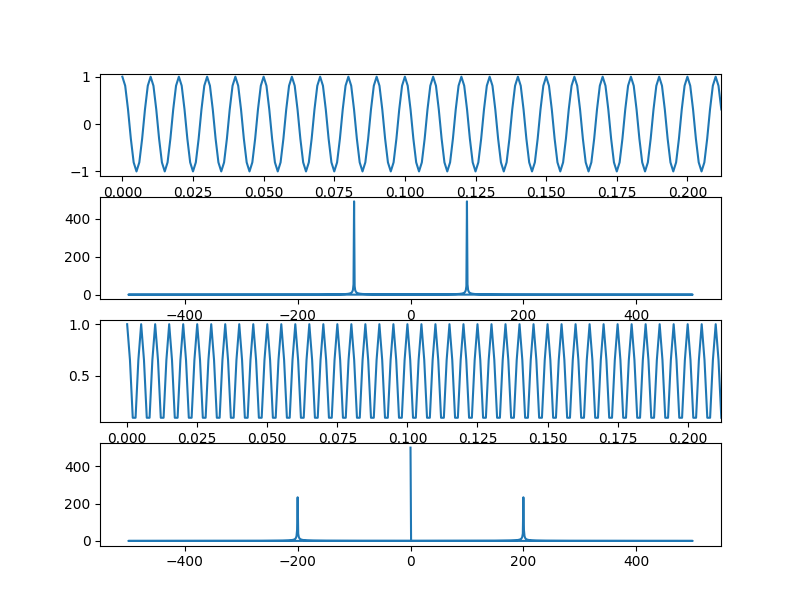

In [8]:
#exercise 3.19 ... showing the effects of nonlinear functions
# part a
Ts = 1.0/1000
f = 100
time = 1
t = np.linspace(0, time, int(time/Ts) + 1)
x = np.cos(2*np.pi * f * t)

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, x)

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

x_sqr = np.square(x)
axs[2].plot(t, x_sqr)

fourier_sqr = np.fft.fft(x_sqr)
n = len(x_sqr)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier_sqr))


<IPython.core.display.Javascript object>


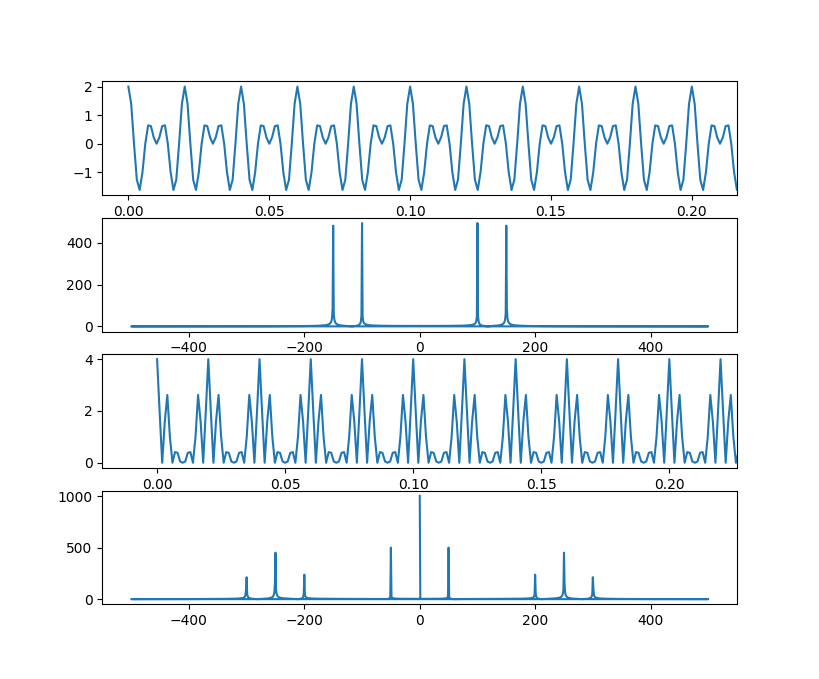

In [11]:
#3.19 part b
Ts = 1.0/1000
f1 = 100
f2 = 150
time = 1
t = np.linspace(0, time, int(time/Ts) + 1)
x = np.cos(2*np.pi * f1 * t) + np.cos(2*np.pi * f2 * t)

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, x)

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

x_sqr = np.square(x)
axs[2].plot(t, x_sqr)

fourier_sqr = np.fft.fft(x_sqr)
n = len(x_sqr)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier_sqr))

Above is part B. Quick explanation of the resulting freqs. 

$(\cos(f_1) + \cos(f_2))^2 = \cos^2(f_1) + \cos(f_1) * \cos(f_2) + \cos^2(f_2)$

We can get the frequency components of those three terms by the Product-to-Sum and Power-Reduction formulas

-  $2\cos(f_1)\cos(f_2) = \cos(f_1 - f_2) + \cos(f_1 + f_2)$
-  $\cos^2(f_1) = \frac{1+\cos(2f_1)}{2}$

So the 5 frequency components turn out to be 0, $f_1 - f_2$, $f_1 + f_2$, $2f_1$, and $2f_2$. Which in the example above for $f_1 = 100$ and $f_2 = 150$ is 0, 50, 250, 200, and 300.

/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


<IPython.core.display.Javascript object>


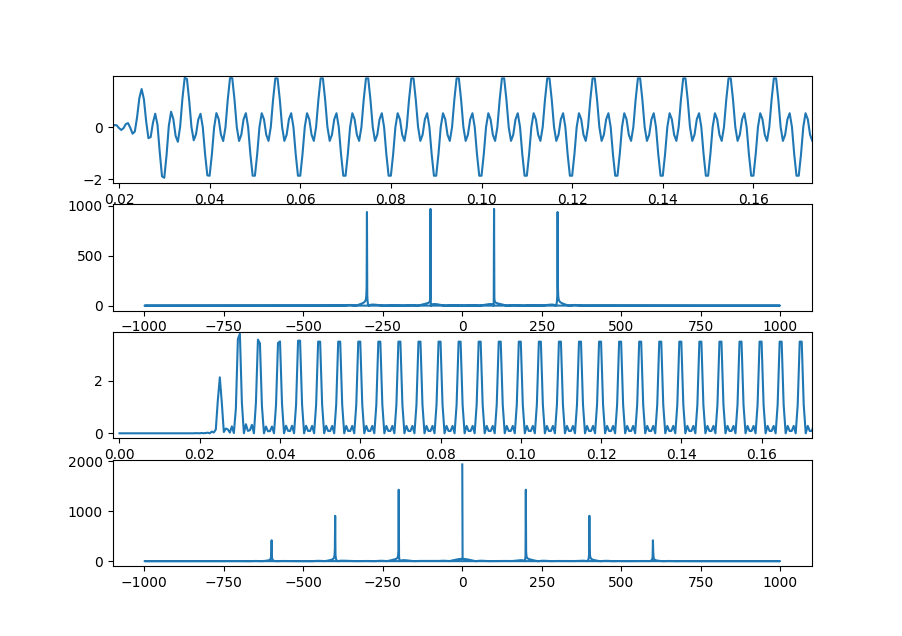

In [15]:
# exercise 3.19 part c
## filtering added. Seems to have little effect because it didn't add in a lot of noise.
Ts = 1.0/2000
f1 = 100
f2 = 300
time = 1
t = np.linspace(0, time, int(time/Ts) + 1)
x = np.cos(2*np.pi * f1 * t) + np.cos(2*np.pi * f2 * t)

freqs = [0, 350, 400, 1000]
amps = [1, 0]
b = signal.remez(100, freqs, amps, fs=int(1/Ts)) #adding taps works well here, but not in the highpass
ylp = signal.lfilter(b, 1, x)

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, ylp)

fourier = np.fft.fft(ylp)
n = len(ylp)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

x_sqr = np.square(ylp)
axs[2].plot(t, x_sqr)

fourier_sqr = np.fft.fft(x_sqr)
n = len(x_sqr)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier_sqr))

<IPython.core.display.Javascript object>


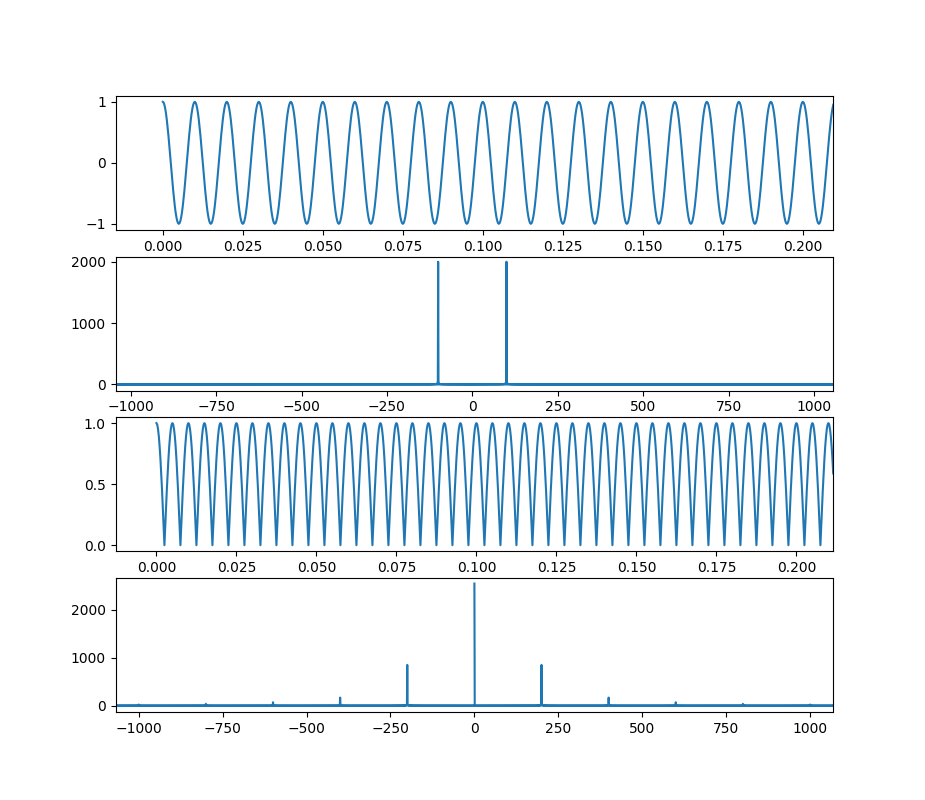

In [19]:
#exercise 3.23 ... showing the effects of nonlinear functions
# part a ... absolute value (i.e. rectification)
Ts = 1.0/4000
f = 100
time = 1
t = np.linspace(0, time, int(time/Ts) + 1)
x = np.cos(2*np.pi * f * t)

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, x)

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

x_abs = np.absolute(x)
axs[2].plot(t, x_abs)

fourier_abs = np.fft.fft(x_abs)
n = len(x_abs)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier_abs))

<IPython.core.display.Javascript object>


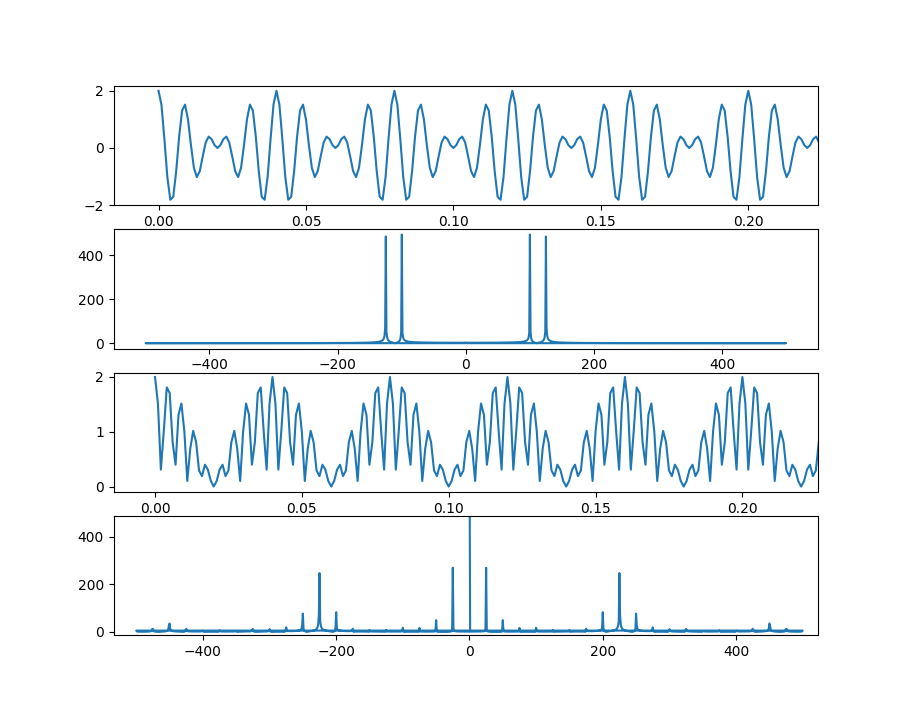

In [22]:
Ts = 1.0/1000
f1 = 100
f2 = 125
time = 1
t = np.linspace(0, time, int(time/Ts) + 1)
x = np.cos(2*np.pi * f1 * t) + np.cos(2*np.pi * f2 * t)

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, x)

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

x_abs = np.absolute(x)
axs[2].plot(t, x_abs)

fourier_abs = np.fft.fft(x_abs)
n = len(x_abs)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier_abs))

# Mixers, section 3.6



<IPython.core.display.Javascript object>


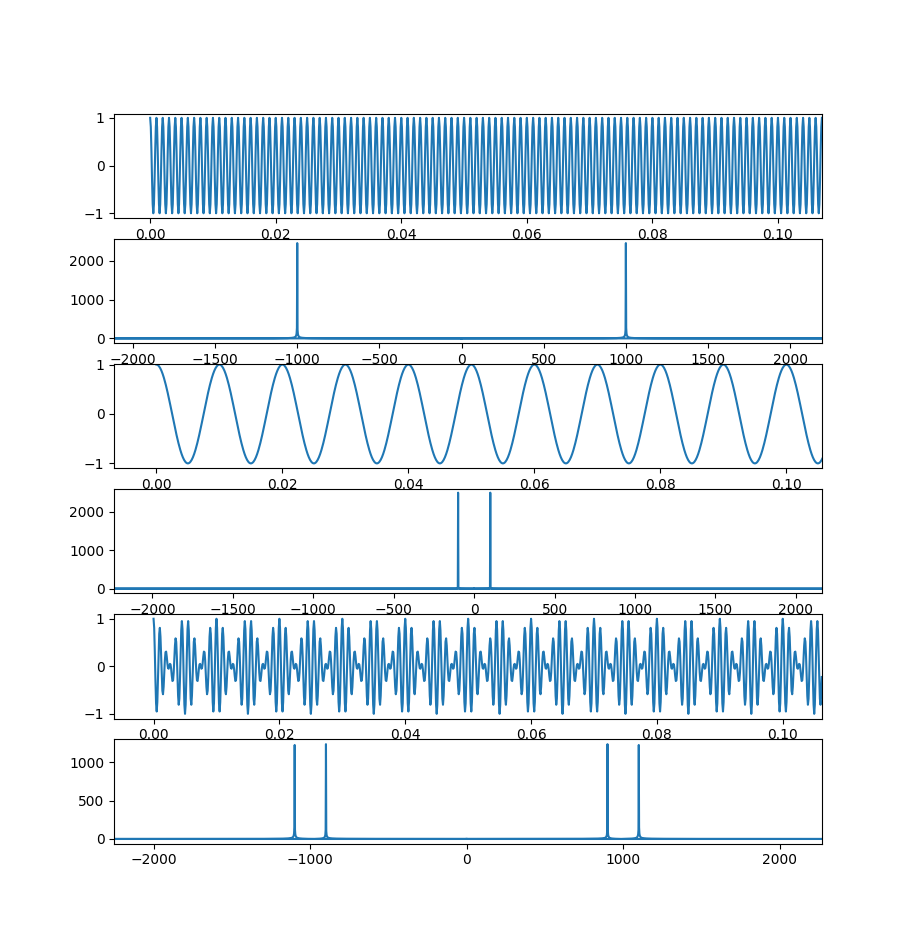

In [28]:
##listing 3.5 modulate.m

time = 0.5
Ts = 1.0/ 10000
t = np.linspace(0, time, int(time/Ts)+1)

fc = 1000
cmod = np.cos(2*np.pi * fc * t)
fi = 100
x = np.cos(2*np.pi * fi * t)

y = cmod * x

fig, axs = plt.subplots(6, 1)

axs[0].plot(t, cmod)

fourier = np.fft.fft(cmod)
n = len(cmod)
freq = np.fft.fftfreq(n, d=Ts)
axs[1].plot(freq, abs(fourier))

axs[2].plot(t, x)

fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
axs[3].plot(freq, abs(fourier))

axs[4].plot(t, y)

fourier = np.fft.fft(y)
n = len(y)
freq = np.fft.fftfreq(n, d=Ts)
axs[5].plot(freq, abs(fourier))

# Adaptation, section 3.7
nothing